# 互评作业2: 频繁模式与关联规则挖掘

姓名：臧梓硕

学号：3120191072

Github：https://github.com/zzsynl126/Datamining_Homework   

作业分析要求：

（1）对数据集进行处理，转换成适合进行关联规则挖掘的形式

（2）找出频繁模式

（3）导出关联规则，计算其支持度和置信度

（4）对规则进行评价，可使用Lift、卡方和其它教材中提及的指标, 至少2种

（5）对挖掘结果进行分析

（6）可视化展示。

提交内容：

（1）对数据集进行处理的代码

（2）关联规则挖掘的代码

（3）挖掘过程的报告：展示挖掘的过程、结果和你的分析

（4）所选择的数据集在README中说明，数据文件不要上传到Github中

## 选用数据集：Wine Reviews

在本次作业中选用作业1中的**Wine Reviews**数据集，该数据集包括两个数据文件**winemag-data_first150k.csv** 和**winemag-data-130k-v2.csv**，其

中第一个文件为第一版本数据文件，第二个文件是在第一版本文件基础上去重并加入额外三个属性列，因为第二个文件加入的属性列为评价人信息，对关联规则

挖掘贡献不大，因此在此次实验中选择Wine数据集中的winemag-data_first150k.csv 文件数据进行处理。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
r_data=pd.read_csv('data/winemag-data_first150k.csv')

## 1、数据预处理

#### 数据处理主要包括以下四个步骤：

1、将**points**和**price,region_1**和**region_2**的属性值与属性标签进行组合，避免因不同的属性存在相同的取值。

2、去掉关联规则挖掘中无用的属性：unnamed、description。

3、去掉所有空值所在行

4、csv数据格式转换成二维list

In [2]:
#数据读取，由于机器性能的限制，我们取1000条数据进行关联性分析
def samples_mlb(work_data):
    data_index= work_data[['country','description','designation','points','price','province','region_1','region_2','variety','winery']]
    data_new=data_index.head(1000)
    data_new.to_csv('./winemag-data_first150k_samples.csv')
r_data=r_data.head(1000)
samples_mlb(r_data)

由于point和price两属性和region_1和region_2两属性的值之间可能会存在相同的值，因此将属性值和属性标签进行组合，使关

联规则挖掘结果更加明确；同时去掉对于关联规则挖掘无用的属性：unnamed、description

In [3]:
# 组合属性名称及属性值
def add_table(index,name):
    for i in range(0,len(index)):
        index[i]=name+'_'+str(index[i])     
    return index

In [4]:
#数据替换为组合后的名称
def mlb_pitch_process(work_data):
    data_new = work_data[['country','description','designation','points','price','province','region_1','region_2','variety','winery']]
    data_new1 = pd.DataFrame(columns=['country','designation','points','price','province','region_1','region_2','variety','winery'])
    data_new1['country'] = data_new['country']
    data_new1['designation'] = data_new['designation']
    points = data_new['points']
    data_new1['points'] = add_table(points,'points')
    price = data_new['price']
    data_new1['price'] = add_table(price,'price')
    data_new1['province'] = data_new['province']
    region_1 = data_new['region_1']
    data_new1['region_1'] = add_table(region_1,'region_1')
    region_2 = data_new['region_2']
    data_new1['region_2'] = add_table(region_2,'region_2')
    data_new1['variety'] = data_new['variety']
    data_new1['winery'] = data_new['winery']
    data_new1.to_csv('./winemag-data_first150k_process.csv')
    return data_new1

In [5]:
r1_data = pd.read_csv('./winemag-data_first150k_samples.csv')
data_new = mlb_pitch_process(r1_data)
data_new.head()

C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\dell\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\dell\anaconda3\lib\site-packages\pandas\core\series.py:1024: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc[key

,country,designation,points,price,province,region_1,region_2,variety,winery
0,US,Martha's Vineyard,points_96,price_235.0,California,region_1_Napa Valley,region_2_Napa,Cabernet Sauvignon,Heitz
1,Spain,Carodorum Selección Especial Reserva,points_96,price_110.0,Northern Spain,region_1_Toro,region_2_nan,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Special Selected Late Harvest,points_96,price_90.0,California,region_1_Knights Valley,region_2_Sonoma,Sauvignon Blanc,Macauley
3,US,Reserve,points_96,price_65.0,Oregon,region_1_Willamette Valley,region_2_Willamette Valley,Pinot Noir,Ponzi
4,France,La Brûlade,points_95,price_66.0,Provence,region_1_Bandol,region_2_nan,Provence red blend,Domaine de la Bégude


对数据预处理时我们选择删除空缺数据进行缺失值的处理，并且转换为列表的形式从而进行后续的关联规则挖掘，并选择前20条

数据进行展示。

In [6]:
# 将数据转换为列表形式
data_new = data_new.dropna()
data_new=data_new[~data_new['region_1'].isin(['region_1_nan'])]
data_new=data_new[~data_new['region_2'].isin(['region_2_nan'])]
transactions = []
for index, row in data_new.iterrows():
    transactions += [(row['country'], row['designation'],row['points'],row['price'],row['province'],row['region_1'],row['region_2'],row['variety'], row['winery'])]

transactions[:20]

[('US',
  "Martha's Vineyard",
  'points_96',
  'price_235.0',
  'California',
  'region_1_Napa Valley',
  'region_2_Napa',
  'Cabernet Sauvignon',
  'Heitz'),
 ('US',
  'Special Selected Late Harvest',
  'points_96',
  'price_90.0',
  'California',
  'region_1_Knights Valley',
  'region_2_Sonoma',
  'Sauvignon Blanc',
  'Macauley'),
 ('US',
  'Reserve',
  'points_96',
  'price_65.0',
  'Oregon',
  'region_1_Willamette Valley',
  'region_2_Willamette Valley',
  'Pinot Noir',
  'Ponzi'),
 ('US',
  'Silice',
  'points_95',
  'price_65.0',
  'Oregon',
  'region_1_Chehalem Mountains',
  'region_2_Willamette Valley',
  'Pinot Noir',
  'Bergström'),
 ('US',
  "Gap's Crown Vineyard",
  'points_95',
  'price_60.0',
  'California',
  'region_1_Sonoma Coast',
  'region_2_Sonoma',
  'Pinot Noir',
  'Blue Farm'),
 ('US',
  'Estate Vineyard Wadensvil Block',
  'points_95',
  'price_48.0',
  'Oregon',
  'region_1_Ribbon Ridge',
  'region_2_Willamette Valley',
  'Pinot Noir',
  'Patricia Green Cellar

需要注意的是，在region_1和region_2两个属性列中存在大量的 'nan' 值，而这个值代表没有具体有意义的值，这就可能导致后续进行关联规则挖掘的时候会存

在很多无意义的关联规则，因此在对整个数据进行关联规则挖掘的时候将这些值进行删除。但在进行不涉及这两个属性的关联规则挖掘的时候则不需要进行该操

作。因为本次作业是在整个数据集中进行，所以选择删除这些数据。

## 2、寻找频繁项集并进行分析

### 利用Apriori算法进行关联规则的挖掘

利用Apriori算法进行关联规则的挖掘，其中minsupport=0.1，minconfidence=0.5，minlift=1。

In [7]:
from collections import defaultdict
import itertools


def apriori(transactions, support=0.1, confidence=0.8, lift=1, minlen=2, maxlen=2):
    item_2_tranidxs = defaultdict(list)
    itemset_2_tranidxs = defaultdict(list)

    for tranidx, tran in enumerate(transactions):
        for item in tran:
            item_2_tranidxs[item].append(tranidx)
            itemset_2_tranidxs[frozenset([item])].append(tranidx)

    item_2_tranidxs = dict([(k, frozenset(v)) for k, v in item_2_tranidxs.items()])
    itemset_2_tranidxs = dict([
        (k, frozenset(v)) for k, v in itemset_2_tranidxs.items()])

    tran_count = float(len(transactions))
    # print('Extracting rules in {} transactions...'.format(int(tran_count)))

    valid_items = set(item
        for item, tranidxs in item_2_tranidxs.items()
            if (len(tranidxs) / tran_count >= support))

    pivot_itemsets = [frozenset([item]) for item in valid_items]
    freqsets = []

    if minlen == 1:
        freqsets.extend(pivot_itemsets)

    for i in range(maxlen - 1):
        new_itemset_size = i + 2
        new_itemsets = []

        for pivot_itemset in pivot_itemsets:
            pivot_tranidxs = itemset_2_tranidxs[pivot_itemset]
            for item, tranidxs in item_2_tranidxs.items():
                if item not in pivot_itemset:
                    common_tranidxs = pivot_tranidxs & tranidxs
                    if len(common_tranidxs) / tran_count >= support:
                        new_itemset = frozenset(pivot_itemset | set([item]))
                        if new_itemset not in itemset_2_tranidxs:
                            new_itemsets.append(new_itemset)
                            itemset_2_tranidxs[new_itemset] = common_tranidxs

        if new_itemset_size > minlen - 1:
            freqsets.extend(new_itemsets)

        pivot_itemsets = new_itemsets

    # print('{} frequent patterns found'.format(len(freqsets)))

    for freqset in freqsets:
        for item in freqset:
            rhs = frozenset([item])
            lhs = freqset - rhs
            support_rhs = len(itemset_2_tranidxs[rhs]) / tran_count
            if len(lhs) == 0:
                lift_rhs = float(1)
                if support_rhs >= support and support_rhs > confidence and lift_rhs > lift:
                    yield (lhs, rhs, support_rhs, support_rhs, lift_rhs)
            else:
                confidence_lhs_rhs = len(itemset_2_tranidxs[freqset]) \
                    / float(len(itemset_2_tranidxs[lhs]))
                lift_lhs_rhs = confidence_lhs_rhs / support_rhs

                if confidence_lhs_rhs >= confidence and lift_lhs_rhs > lift:
                    support_lhs_rhs = len(itemset_2_tranidxs[freqset]) / tran_count
                    yield (lhs, rhs, support_lhs_rhs, confidence_lhs_rhs, lift_lhs_rhs)

In [8]:
rules = apriori(transactions, support=0.1, confidence=0.5, lift=1)
rules_sorted = sorted(rules, key=lambda x: (x[4], x[3], x[2]), reverse=True) # ORDER BY lift DESC, confidence DESC, support DESC

for r in rules_sorted:
    print(r)

(frozenset({'region_2_Columbia Valley'}), frozenset({'Washington'}), 0.10119047619047619, 1.0, 9.333333333333334)
(frozenset({'Washington'}), frozenset({'region_2_Columbia Valley'}), 0.10119047619047619, 0.9444444444444444, 9.333333333333332)
(frozenset({'region_2_Willamette Valley'}), frozenset({'Oregon'}), 0.13988095238095238, 1.0, 6.588235294117648)
(frozenset({'Oregon'}), frozenset({'region_2_Willamette Valley'}), 0.13988095238095238, 0.9215686274509803, 6.588235294117647)
(frozenset({'region_1_Napa Valley'}), frozenset({'region_2_Napa'}), 0.10714285714285714, 1.0, 6.109090909090909)
(frozenset({'region_2_Napa'}), frozenset({'region_1_Napa Valley'}), 0.10714285714285714, 0.6545454545454545, 6.109090909090909)
(frozenset({'region_2_Willamette Valley'}), frozenset({'Pinot Noir'}), 0.11011904761904762, 0.7872340425531915, 3.3063829787234047)
(frozenset({'Oregon'}), frozenset({'Pinot Noir'}), 0.1130952380952381, 0.7450980392156863, 3.129411764705883)
(frozenset({'region_2_Central Coast

上图是挖掘出的频繁项集结果，下面将结果以表格的形式进行展示，方便后续分析。

### 导出关联规则及其支持度和置信度以及lift值

In [9]:
import csv 

with open('result.csv', 'wt') as f:
    f_csv = csv.writer(f, delimiter=',')
    f_csv.writerow(['rule', 'sup', 'conf', 'lift'])
    for r in rules_sorted:
        f_csv.writerow([f'{str(list(r[0])[0])} => {str(list(r[1])[0])}', r[2], r[3], r[4]])

pd.read_csv('result.csv')

,rule,sup,conf,lift
0,region_2_Columbia Valley => Washington,0.101190,1.000000,9.333333
1,Washington => region_2_Columbia Valley,0.101190,0.944444,9.333333
2,region_2_Willamette Valley => Oregon,0.139881,1.000000,6.588235
3,Oregon => region_2_Willamette Valley,0.139881,0.921569,6.588235
4,region_1_Napa Valley => region_2_Napa,0.107143,1.000000,6.109091
5,region_2_Napa => region_1_Napa Valley,0.107143,0.654545,6.109091
6,region_2_Willamette Valley => Pinot Noir,0.110119,0.787234,3.306383
7,Oregon => Pinot Noir,0.113095,0.745098,3.129412
8,region_2_Central Coast => California,0.255952,1.000000,1.400000
9,region_2_Sonoma => California,0.181548,1.000000,1.400000


###  对规则进行评价

选择Lift， Kulc对规则进行评价，下面对两个评价指标进行说明：

（1）Lift为相关性系数，反映了“项集A的出现”对项集B的出现概率发生了多大的变化,如果该值=1,说明两个条件没有任何关联,如果<1,说明A条件(或者说A事

件的发生)与B事件是相斥的。

（2）Kulc：表示将两种事件作为条件的置信度的均值,避开了支持度的计算,因此不会受零和事务的影响。在上一步利用Apriori进行关联规则挖掘时已经计算出

了lift的值，下面计算Kulc值对规则进行评价

In [10]:
res = []
for r in rules_sorted:
    conf1 = r[3]
    for r2 in rules_sorted:
        if r2[0] == r[1] and r2[1] == r[0]:
            conf2 = r2[3]
    kulc = (conf1 + conf2) / 2
    res.append(kulc)

res

[0.9722222222222222,
 0.9722222222222222,
 0.9607843137254901,
 0.9607843137254901,
 0.8272727272727273,
 0.8272727272727273,
 0.8936170212765957,
 0.8725490196078431,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9239130434782609,
 0.9183673469387755,
 0.8823529411764706]

上面显示的结果是对于每条关联规则的Kulc值的计算结果,同样为了更直观的展示，把Kulc值加入之前的表格中进行展示。

In [11]:
data = pd.read_csv(r'result.csv')
data['Kulc']=res
data.to_csv(r"result_new.csv",mode = 'a',index =False)
pd.read_csv('result_new.csv')

,rule,sup,conf,lift,Kulc
0,region_2_Columbia Valley => Washington,0.101190,1.000000,9.333333,0.972222
1,Washington => region_2_Columbia Valley,0.101190,0.944444,9.333333,0.972222
2,region_2_Willamette Valley => Oregon,0.139881,1.000000,6.588235,0.960784
3,Oregon => region_2_Willamette Valley,0.139881,0.921569,6.588235,0.960784
4,region_1_Napa Valley => region_2_Napa,0.107143,1.000000,6.109091,0.827273
5,region_2_Napa => region_1_Napa Valley,0.107143,0.654545,6.109091,0.827273
6,region_2_Willamette Valley => Pinot Noir,0.110119,0.787234,3.306383,0.893617
7,Oregon => Pinot Noir,0.113095,0.745098,3.129412,0.872549
8,region_2_Central Coast => California,0.255952,1.000000,1.400000,1.000000
9,region_2_Sonoma => California,0.181548,1.000000,1.400000,1.000000


下面对关联规则进行可视化，绘制散点图，其中横坐标为support值，纵坐标为confidence值，点的颜色代表lift值，lift值和颜色对应如图例所示。

In [12]:
midwest = pd.read_csv('result.csv')
x=midwest['sup']
y=midwest['conf']
colors=midwest['lift']
rng = np.random.RandomState(10)


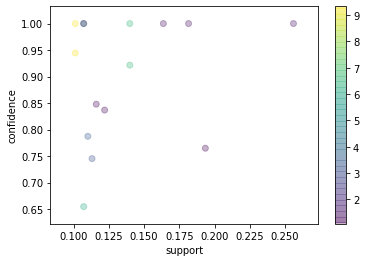

In [13]:
plt.scatter(x,y,c=colors,  alpha=0.3)
plt.xlabel('support')
plt.ylabel('confidence')
plt.colorbar()

我们可以看到关联规则更集中于低支持度高置信度的区域。

## 3、对挖掘结果进行分析

由于关联规则的结果分析大致相同且此次抽取的关联规则较多，因此我们选取部分关联规则进行分析，

### 部分关联结果分析

（1）关联规则1：Oregon => Pinot Noir：在测试的这些红酒中Oregon州葡萄酒的葡萄品种多为Pinot Noir

（2）关联规则2：Washington => region_2_Columbia Valley：Washington的红酒多来自于Columbia Valley


### 关联结果验证及可视化展示

这里我们以挖掘到的 Oregon => Pinot Noir 关联规则为例进行挖掘结果的验证

In [14]:
data_new[data_new['province'] == 'Oregon'].sample(20)

,country,designation,points,price,province,region_1,region_2,variety,winery
591,US,Medici Vineyard,points_93,price_48.0,Oregon,region_1_Chehalem Mountains,region_2_Willamette Valley,Pinot Noir,Patricia Green Cellars
612,US,Oregon Hawks View Vineyard,points_91,price_26.0,Oregon,region_1_Chehalem Mountains,region_2_Willamette Valley,Pinot Gris,Hawks View
14,US,Grace Vineyard,points_95,price_185.0,Oregon,region_1_Dundee Hills,region_2_Willamette Valley,Pinot Noir,Domaine Serene
317,US,Ribbon Ridge Estate,points_94,price_49.0,Oregon,region_1_Ribbon Ridge,region_2_Willamette Valley,Pinot Noir,Trisaetum
762,US,Reserve Rêve Estate,points_89,price_45.0,Oregon,region_1_Willamette Valley,region_2_Willamette Valley,Pinot Noir,Provincial Vineyards
12,US,Weber Vineyard,points_95,price_48.0,Oregon,region_1_Dundee Hills,region_2_Willamette Valley,Pinot Noir,Patricia Green Cellars
674,US,Diversité,points_88,price_48.0,Oregon,region_1_Willamette Valley,region_2_Willamette Valley,Pinot Noir,Le Cadeau
767,US,Grande Cuvée,points_89,price_28.0,Oregon,region_1_Willamette Valley,region_2_Willamette Valley,Pinot Noir,Soléna
915,US,Récolte Grand Cru,points_93,price_125.0,Oregon,region_1_Dundee Hills,region_2_Willamette Valley,Chardonnay,Domaine Serene
656,US,Truffle Hill,points_90,price_24.0,Oregon,region_1_Willamette Valley,region_2_Willamette Valley,Chardonnay,Left Coast Cellars


上面的表格是经过预处理后的数据中Province为Oregon的数据，选取了前20条进行展示。下面对数据进行可视化

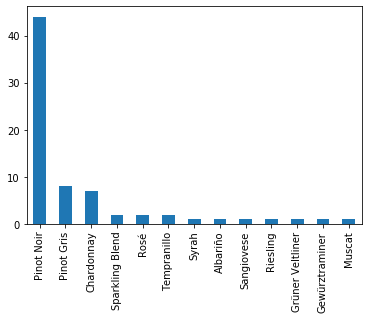

In [15]:
r_data[r_data['province'] == 'Oregon']['variety'].value_counts().plot(kind='bar')

从上面的直方图我们可以直观的看出，Oregon的葡萄酒所用的葡萄品种最多的就是Pinot Noir。